Epoka 1/10, Obraz 30000/60000
Epoka 1/10, Obraz 60000/60000
Epoka 1/10, Dokładność: 91.55%, Błąd: 0.015767
Epoka 2/10, Obraz 30000/60000
Epoka 2/10, Obraz 60000/60000
Epoka 2/10, Dokładność: 96.09%, Błąd: 0.007960
Epoka 3/10, Obraz 30000/60000
Epoka 3/10, Obraz 60000/60000
Epoka 3/10, Dokładność: 97.33%, Błąd: 0.005714
Epoka 4/10, Obraz 30000/60000
Epoka 4/10, Obraz 60000/60000
Epoka 4/10, Dokładność: 97.96%, Błąd: 0.004525
Epoka 5/10, Obraz 30000/60000
Epoka 5/10, Obraz 60000/60000
Epoka 5/10, Dokładność: 98.44%, Błąd: 0.003587
Epoka 6/10, Obraz 30000/60000
Epoka 6/10, Obraz 60000/60000
Epoka 6/10, Dokładność: 98.91%, Błąd: 0.002784
Epoka 7/10, Obraz 30000/60000
Epoka 7/10, Obraz 60000/60000
Epoka 7/10, Dokładność: 99.13%, Błąd: 0.002318
Epoka 8/10, Obraz 30000/60000
Epoka 8/10, Obraz 60000/60000
Epoka 8/10, Dokładność: 99.35%, Błąd: 0.001881
Epoka 9/10, Obraz 30000/60000
Epoka 9/10, Obraz 60000/60000
Epoka 9/10, Dokładność: 99.48%, Błąd: 0.001532
Epoka 10/10, Obraz 30000/60000
Epoka 

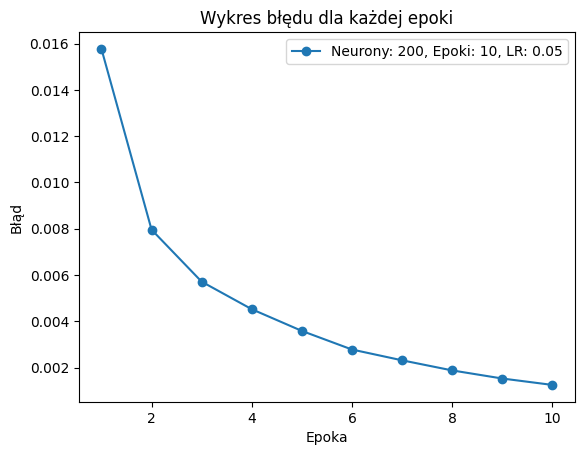

Epoka 500/1000, Całkowity błąd: 367.420129
Epoka 1000/1000, Całkowity błąd: 365.196263
Średniokwadratowy błąd aproksymacji: 0.379587


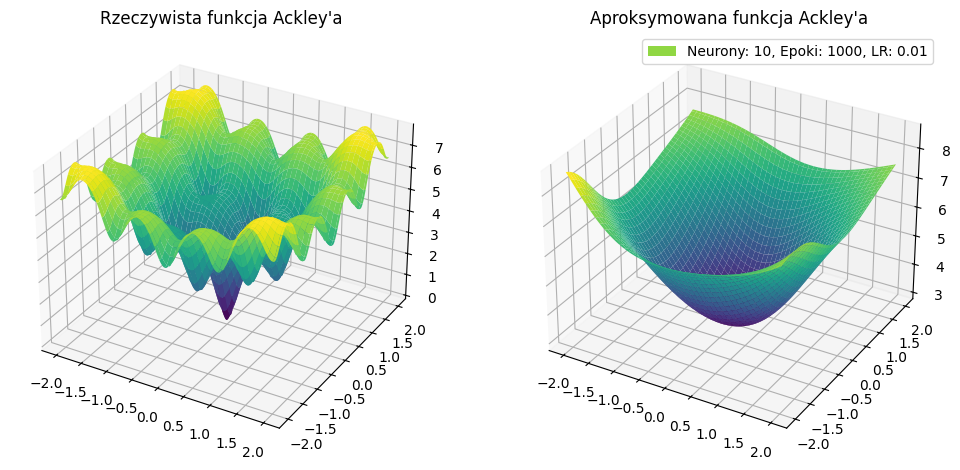

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Funkcje pomocnicze do wczytywania danych
def wczytaj_obrazy(sciezka):
    with open(sciezka, 'rb') as f:
        magic, liczba_obrazow, liczba_wierszy, liczba_kolumn = np.frombuffer(f.read(16), dtype=np.uint32).byteswap()
        dane = np.frombuffer(f.read(), dtype=np.uint8)
        return dane.reshape((liczba_obrazow, liczba_wierszy, liczba_kolumn))

def wczytaj_etykiety(sciezka):
    with open(sciezka, 'rb') as f:
        magic, liczba_etykiet = np.frombuffer(f.read(8), dtype=np.uint32).byteswap()
        return np.frombuffer(f.read(), dtype=np.uint8)

def one_hot(etykiety, liczba_klas=10):
    one_hot_matrix = np.zeros((len(etykiety), liczba_klas))
    for idx, etykieta in enumerate(etykiety):
        one_hot_matrix[idx, etykieta] = 1
    return one_hot_matrix.reshape(-1, liczba_klas, 1)

# Ścieżki do plików danych w Google Colab
train_images_path = '/content/train-images.idx3-ubyte'
train_labels_path = '/content/train-labels.idx1-ubyte'
test_images_path = '/content/t10k-images.idx3-ubyte'
test_labels_path = '/content/t10k-labels.idx1-ubyte'

# Wczytanie danych
obrazy_ucz = wczytaj_obrazy(train_images_path)
etykiety_ucz = wczytaj_etykiety(train_labels_path)
obrazy_test = wczytaj_obrazy(test_images_path)
etykiety_test = wczytaj_etykiety(test_labels_path)

# Normalizacja danych
obrazy_ucz = obrazy_ucz / 255.0
obrazy_test = obrazy_test / 255.0

# Zmiana rozmiaru danych do wektorów 784x1
obrazy_ucz = obrazy_ucz.reshape(obrazy_ucz.shape[0], -1, 1)  # 60000x784x1
obrazy_test = obrazy_test.reshape(obrazy_test.shape[0], -1, 1)  # 10000x784x1

# Kodowanie etykiet
etykiety_ucz = one_hot(etykiety_ucz)
etykiety_test = one_hot(etykiety_test)
#-----------------------------------------------------------------------------------------------------------
# Parametry uczenia
neurony = 200;
liczba_epok = 10
wspolczynnik_uczenia = 0.05

lista_bledow = []

#-----------------------------------------------------------------------------------------------------------
# Inicjalizacja parametrów sieci neuronowej
w_i_h = np.random.uniform(-0.5, 0.5, (neurony, 784))   # Wagi warstwy wejściowej
w_h_o = np.random.uniform(-0.5, 0.5, (10, neurony))    # Wagi warstwy ukrytej
b_i_h = np.zeros((200, 1))                         # Biasy warstwy ukrytej
b_h_o = np.zeros((10, 1))                         # Biasy warstwy wyjściowej


# Trening modelu
for epoka in range(liczba_epok):
    calkowity_blad = 0
    liczba_poprawnych = 0

    for idx, (obraz, etykieta) in enumerate(zip(obrazy_ucz, etykiety_ucz)):
        # Propagacja wprzód
        h_pre = b_i_h + w_i_h @ obraz
        h = 1 / (1 + np.exp(-h_pre))  # Sigmoidalna
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))  # Sigmoidalna

        # Obliczanie błędu
        blad = 1 / len(o) * np.sum((o - etykieta) ** 2)
        calkowity_blad += blad
        liczba_poprawnych += int(np.argmax(o) == np.argmax(etykieta))

        # Propagacja wsteczna
        delta_o = o - etykieta
        w_h_o -= wspolczynnik_uczenia * delta_o @ h.T
        b_h_o -= wspolczynnik_uczenia * delta_o

        delta_h = (w_h_o.T @ delta_o) * (h * (1 - h))
        w_i_h -= wspolczynnik_uczenia * delta_h @ obraz.T
        b_i_h -= wspolczynnik_uczenia * delta_h

        # Wyświetlanie postępu
        if (idx + 1) % 30000 == 0:
            print(f"Epoka {epoka+1}/{liczba_epok}, Obraz {idx+1}/{len(obrazy_ucz)}")

    sredni_blad = calkowity_blad / len(obrazy_ucz)
    lista_bledow.append(sredni_blad)
    dokladnosc = (liczba_poprawnych / len(obrazy_ucz)) * 100
    print(f"Epoka {epoka+1}/{liczba_epok}, Dokładność: {dokladnosc:.2f}%, Błąd: {sredni_blad:.6f}")

# Testowanie modelu
liczba_poprawnych_test = 0
for idx, (obraz, etykieta) in enumerate(zip(obrazy_test, etykiety_test)):
    h_pre = b_i_h + w_i_h @ obraz
    h = 1 / (1 + np.exp(-h_pre))
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))
    liczba_poprawnych_test += int(np.argmax(o) == np.argmax(etykieta))

    # Wyświetlanie postępu testowania
    if (idx + 1) % 2000 == 0:
        print(f"Testowanie - Obraz {idx+1}/{len(obrazy_test)}")

dokladnosc_test = (liczba_poprawnych_test / len(obrazy_test)) * 100
print(f"Dokładność na zbiorze testowym: {dokladnosc_test:.2f}%")

# Wykres błędu
plt.plot(range(1, liczba_epok + 1), lista_bledow, marker='o', label=f"Neurony: {neurony}, Epoki: {liczba_epok}, LR: {wspolczynnik_uczenia}")
plt.title('Wykres błędu dla każdej epoki')
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend()
plt.show()

# Aproksymacja funkcji dwuwymiarowej - Ackley
def ackley(x1, x2):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - \
           np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + \
           np.exp(1) + 20

# Generowanie danych treningowych
x1_train = np.random.uniform(-2, 2, 1000)
x2_train = np.random.uniform(-2, 2, 1000)
y_train = ackley(x1_train, x2_train)

# Generowanie danych testowych w regularnych odstępach
x1_test = np.arange(-2, 2.01, 0.01)
x2_test = np.arange(-2, 2.01, 0.01)
x1_test_grid, x2_test_grid = np.meshgrid(x1_test, x2_test)
y_test_actual = ackley(x1_test_grid, x2_test_grid)

# Przygotowanie danych wejściowych
X_train = np.vstack((x1_train, x2_train)).T
X_test = np.vstack((x1_test_grid.ravel(), x2_test_grid.ravel())).T

# Normalizacja danych
X_train = (X_train + 2) / 4  # skalowanie na zakres [0, 1]
X_test = (X_test + 2) / 4

# Inicjalizacja parametrów sieci neuronowej
input_dim = 2  # dwa wejścia: x1, x2
hidden_dim = 10
output_dim = 1

# Parametry uczenia
learning_rate = 0.01
epochs = 1000

w_i_h = np.random.uniform(-0.5, 0.5, (hidden_dim, input_dim))  # Wagi wejście-ukryta
w_h_o = np.random.uniform(-0.5, 0.5, (output_dim, hidden_dim))  # Wagi ukryta-wyjście
b_i_h = np.zeros((hidden_dim, 1))  # Biasy warstwy ukrytej
b_h_o = np.zeros((output_dim, 1))  # Biasy warstwy wyjściowej

# Parametry uczenia
#learning_rate = wspolczynnik_uczenia
#epochs = liczba_epok

# Trenowanie modelu
for epoch in range(epochs):
    total_error = 0
    for x, y in zip(X_train, y_train):
        x = x.reshape(-1, 1)
        y = np.array([[y]])

        # Propagacja w przód
        h_pre = b_i_h + w_i_h @ x
        h = 1 / (1 + np.exp(-h_pre))  # Sigmoidalna
        o_pre = b_h_o + w_h_o @ h
        o = o_pre  # Funkcja liniowa na wyjściu

        # Obliczanie błędu
        error = (o - y) ** 2
        total_error += error

        # Propagacja wsteczna
        delta_o = o - y
        w_h_o -= learning_rate * delta_o @ h.T
        b_h_o -= learning_rate * delta_o

        delta_h = (w_h_o.T @ delta_o) * (h * (1 - h))
        w_i_h -= learning_rate * delta_h @ x.T
        b_i_h -= learning_rate * delta_h

    if (epoch + 1) % 500 == 0:
        print(f"Epoka {epoch + 1}/{epochs}, Całkowity błąd: {total_error[0, 0]:.6f}")

# Testowanie modelu
y_test_pred = []
for x in X_test:
    x = x.reshape(-1, 1)
    h_pre = b_i_h + w_i_h @ x
    h = 1 / (1 + np.exp(-h_pre))
    o_pre = b_h_o + w_h_o @ h
    o = o_pre
    y_test_pred.append(o[0, 0])
y_test_pred = np.array(y_test_pred).reshape(x1_test_grid.shape)

# Obliczanie średniokwadratowego błędu
mse = np.mean((y_test_pred - y_test_actual) ** 2)
print(f"Średniokwadratowy błąd aproksymacji: {mse:.6f}")

# Wizualizacja wyników
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1_test_grid, x2_test_grid, y_test_actual, cmap='viridis')
ax1.set_title('Rzeczywista funkcja Ackley\'a')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x1_test_grid, x2_test_grid, y_test_pred, cmap='viridis', label=f"Neurony: {hidden_dim}, Epoki: {epochs}, LR: {learning_rate}")
ax2.set_title('Aproksymowana funkcja Ackley\'a')
ax2.legend()

plt.show()


